# Hausaufgabe 2
## Ablassung eines Stausees
<!-- Lizensiert unter (CC BY 2.0) Gert Herold, 2020 -->

Wegen Reparaturarbeiten an der Staumauer einer Talsperre soll das Wasser abgelassen werden. Der See habe ein Fassungsvermögen von $215 \cdot 10^6\,\text{m}^3$. Die Oberfläche des Stausees erstrecke sich über $10\,\text{km}^2$. Der Wasserauslass auf Grundhöhe habe einen Querschnitt von $2\,\text{m}^2$. Der Fluss selbst werde so umgeleitet, dass kein Wasser in den See nachfließen kann.

**1) Es werde angenommen, die Form des Sees lasse sich mit einem umgedrehten [Kegel](https://de.wikipedia.org/wiki/Kegel_(Geometrie)) annähern. Wie tief ist dann der See?** 

In [22]:
V0 = 215e6      # m^3
A0 = 10e6       # m^2

z0 = 3*V0/A0    # m

A_out = 2       # m^2

print('z0: {} m'.format(z0))

z0: 64.5 m


Vereinfachend werde angenommen, dass die sich ausbildende Strömung sich mithilfe der [Bernoulli-Gleichung](https://de.wikipedia.org/wiki/Bernoulli-Gleichung) beschreiben lasse:

$$
\frac{u^2}{2}+\frac{p}{\rho}+g \, z = \text{const}
$$

Dabei beschreibt $u$ die Strömungsgeschwindigkeit des Fluids an einer beliebigen betrachteten Stelle, $p$ den hydrodynamischen Druck, $\rho$ die Dichte und $z$ die Höhe. $g=9{,}81\frac{\text{m}}{\text{s}^2}$ ist die Erdbeschleunigung. Werden nur die Seeoberfläche und der Ausfluss betrachtet, so kann der Druck $p$ ebenfalls als konstant angenommen werden, da er dem Umgebungsdruck entspricht. Ebenso wird die Dichte als konstant angenommen, und die obige Gleichung vereinfacht sich zu 

$$
\frac{u^2}{2}+g \, z = \text{const}
$$

bzw. für oben und unten:

$$
\frac{u_\text{oben}^2}{2}+g \, z_\text{oben} = \frac{u_\text{unten}^2}{2}+g \, z_\text{unten}
$$

**2) Berechnen Sie die sich anfangs ausbildende Strömungsgeschwindigkeit am Ausfluss $u_\text{unten,0}$ sowie den Volumenstrom $\dot{V_0}$ unter der Annahme, dass die Bewegung der Seeoberfläche vernachlässigbar ist.**

In [23]:
g = 9.81                   # m/s^2
u_unten_0 = (2*g*z0)**0.5  # m/s
V_dot_0 = u_unten_0*A_out



Tipp: Um die Kreiszahl $\pi$ unter Python verwenden zu können, muss man sie entweder selbst definieren oder z.B. aus dem [NumPy-Modul](https://numpy.org/) importieren. Für ein Beispiel den folgenden Code-Abschnitt öffnen.

In [24]:
# Importiere pi aus numpy
from numpy import pi, arctan, tan

# Berechne den "Radius" der Seeoberfläche
r0 = (A0/pi)**0.5
print(f'Radius: {r0/1000:.2f} km')

alpha = arctan(r0/z0)
print(f'Der halbe Öffnungswinkel ist {alpha:.30f}')

Radius: 1.78 km
Der halbe Öffnungswinkel ist 1.534659871187229018829611959518


**3) Schreiben Sie eine Funktion, die die Tiefe des "Kegel"-Sees allgemein abhängig von der enthaltenen Wassermenge bestimmt.**

In [25]:
def tiefe_kegel(V):
    if V >= 0:
        return ((3 * V) / ((r0 / z0) ** 2 * pi)) ** (1/3)
    else:
        return -((3 * -V) / ((r0 / z0) ** 2 * pi)) ** (1/3)

print('{}'.format(tiefe_kegel(215e6)))
 

64.49999999999999


**4) Schreiben Sie eine Funktion, die ausgehend von einem Startvolumen $V_0$ und einer gegebenen Zeitschrittweite $\Delta t$ den diskreten Zeitverlauf der Wassertiefe $h(t)$ bis zur Leerung des Sees zurückgibt. Beachten Sie, dass sich auch der Volumenstrom zeitlich ändert.** *(Hinweis: Die Änderung des Volumens lässt sich annähernd über $V_{n+1}=V_n-\dot{V_n} \cdot \Delta t$ beschreiben.)*

In [26]:
def abfluss(V0, dt, height_func):

    t_list = [0]
    V_list = [V0]
    h_list = [height_func(V0)]
    
    while V_list[-1] > 0:
        u_unten_0 = (2*g*h_list[-1])**0.5    # m/s
        V_dot_0 = u_unten_0*A_out            # m^3/s
        V_next = V_list[-1] - (V_dot_0 * dt)
        V_list.append(V_next)
        h_list.append(height_func(V_list[-1]))
        t_list.append(t_list[-1]+dt)
    
    return t_list, h_list, V_list

t_list_min, h_list_min, V_list_min = abfluss(V0, 60, tiefe_kegel)
t_list_day, h_list_day, V_list_day = abfluss(V0, 60*60*24*4, tiefe_kegel)

V_list_Kegel = V_list_min
t_list_Kegel = t_list_min

**5) Wie lange dauert es, bis der Stausee komplett abgelassen wurde? Plotten Sie den Zeitverlauf der Wassertiefe bis zur Leerung für zwei Zeitschrittweiten:**
  * $\Delta t_1$ = 1 Minute
  * $\Delta t_2$ = 4 Tage

**Diskutieren Sie Auffälligkeiten.**

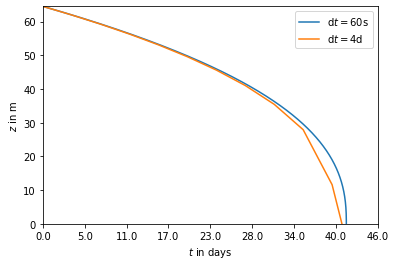

In [27]:
%matplotlib inline
from matplotlib.pyplot import plot, show, legend, xlabel, ylabel, xticks, xlim, ylim
# Plotbefehl: plot(x_werte_liste, y_werte_liste)
# Hier eigenen Code schreiben ...

plot(t_list_min, h_list_min, label='$\mathrm{d}t=60\mathrm{s}$')
plot(t_list_day, h_list_day, label='$\mathrm{d}t=4\mathrm{d}$')
legend()
xlabel('$t$ in days')
ylabel('$z$ in m')
xlim([0, max(t_list_min[-1], t_list_day[-1])])
ylim([0, h_list_min[0]])

locs, labels = xticks()
xticks(locs, locs//(60*60*24))


show()

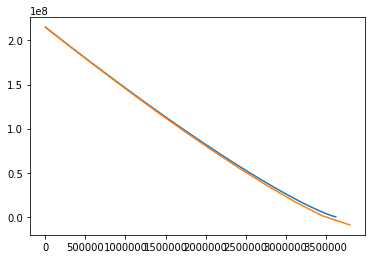

In [28]:
plot(t_list_min, V_list_min, label='$\mathrm{d}t=60\mathrm{s}$')
plot(t_list_day, V_list_day, label='$\mathrm{d}t=4\mathrm{d}$')
show()

**6) Wiederholen Sie Aufgabenteil 5) unter der Annahme, dass der See bei gleichem Volumen und gleicher Oberfläche annähernd durch einen *Zylinder* beschrieben wird. Vermeiden Sie soweit wie möglich redundanten Code.**

([<matplotlib.axis.XTick at 0x23402954308>,
 <a list of 5 Text xticklabel objects>)

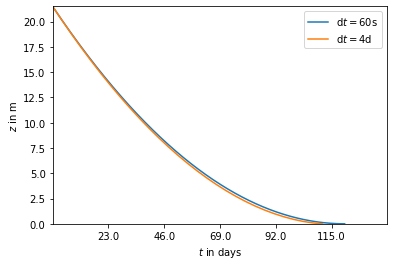

In [29]:
def tiefe_zylinder(V):
    return (V/(r0**2*pi))

t_list_min, h_list_min, V_list_min = abfluss(V0, 60, tiefe_zylinder)
t_list_day, h_list_day, V_list_day = abfluss(V0, 60*60*24*4, tiefe_zylinder)

V_list_Zylinder = V_list_min
t_list_Zylinder = t_list_min

plot(t_list_min, h_list_min, label='$\mathrm{d}t=60\mathrm{s}$')
plot(t_list_day, h_list_day, label='$\mathrm{d}t=4\mathrm{d}$')
legend()
xlabel('$t$ in days')
ylabel('$z$ in m')
xlim([0, max(t_list_min[-1], t_list_day[-1])])
ylim([0, h_list_min[0]])

locs, labels = xticks()
xticks(locs, locs//(60*60*24))

locs, labels = xticks()
xticks(locs[1:-1], locs[1:-1]//(60*60*24))

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


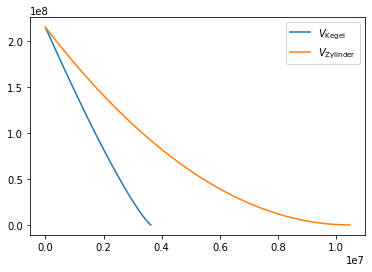

In [31]:
plot(t_list_Kegel, V_list_Kegel, label='$V_{\mathrm{Kegel}}$')
plot(t_list_Zylinder, V_list_Zylinder, label='$V_{\mathrm{Zylinder}}$')
legend()
show()